# Predictions using TF-lite
* Remove Tensorflow dependency

## Install `tflite-runtime`

In [44]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/


## Dependencies

In [45]:
import tflite_runtime.interpreter as tflite
from PIL import Image
from io import BytesIO
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

## Helper functions
* preprocess image
* predict facial emotion

In [46]:
def prepare_input(url):
    
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    img = img.convert('L')
    img = img.resize((48, 48), Image.NEAREST)
    x = np.array(img)
    X = np.array([x])
    X = np.expand_dims(np.float32(X), axis=-1)

    return X

def predict(url):
    X = prepare_input(url)

    interpreter.set_tensor(input_index, X)
    interpreter.invoke()
    preds = interpreter.get_tensor(output_index)

    float_predictions = preds[0].tolist()

    return dict(zip(class_labels, float_predictions))

## Test URL

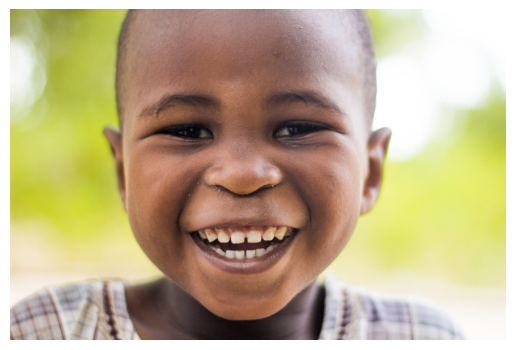

In [57]:
url = 'https://upload.wikimedia.org/wikipedia/commons/0/09/The_joy_of_the_happy_face_by_Rasheedhrasheed.jpg'
with request.urlopen(url) as resp:
        buffer = resp.read()
stream = BytesIO(buffer)
img = Image.open(stream)

plt.imshow(img);
plt.axis('off');

## Loading model

In [58]:
interpreter = tflite.Interpreter(model_path='../models/emotion_classifier.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

class_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

## Prediction using model

In [59]:
predict(url)

{'Anger': 8.256378446588042e-35,
 'Disgust': 2.9382650407717056e-39,
 'Fear': 2.9382650407717056e-39,
 'Happy': 1.0,
 'Neutral': 0.0,
 'Sadness': 0.0,
 'Surprise': 0.0}